## Observations and Insights 

Observations and Insights:
- Dataset includes 1893 samples, inclduing 5 duplicate mices (ID:g989)
- 10 drug regiments were used in this dataset. The hightest average of drug regimens which were used, were Ketapril and Naftisol, and the loweset average of drug regiments which were used, were Ramicane and Capomulin
- Capomulin and Ramicane had the highest number of timepoints, however they had lowest averge tumor volume.
- Female's quantity was smaller male's quantity.
- For Mouse X401, the more the time was treated with Capomulin, the less tumor volume it was received.
- For Capomulin regimen, the heavier the mouse, the more tumor volume was used. 

In [299]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.DataFrame.merge(mouse_metadata,study_results, how ="outer", on = ["Mouse ID"])
data_df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [300]:
# Checking the number of mice.
data_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [301]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [302]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df.drop(data_df[data_df['Mouse ID']=='g989'].index, inplace=True)
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [363]:
clean = data_df.drop(data_df[data_df['Mouse ID']=='g989'].index, inplace=True)
clean_df=pd.DataFrame(clean)



## Summary Statistics

In [371]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_regi = data_df.groupby(["Drug Regimen"])

data_regi_mean = data_regi["Tumor Volume (mm3)"].mean() 
data_regi_median = data_regi["Tumor Volume (mm3)"].median() 
data_regi_var = data_regi["Tumor Volume (mm3)"].var() 
data_regi_std = data_regi["Tumor Volume (mm3)"].std() 
data_regi_sem = data_regi["Tumor Volume (mm3)"].sem() 

data_sum = pd.DataFrame({
            "Mean": round(data_regi_mean,2),
            "Median": round(data_regi_median,2),
            "Var": round(data_regi_var,2),
            "Std": round(data_regi_std, 2),
            "data_regi_sem": round(data_regi_sem,2)})
                            
data_sum



,Mean,Median,Var,Std,data_regi_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [333]:

# Using the aggregation method, produce the same summary statistics in a single line
data_sum_aggr = data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median','var', 'std', 'sem'])
data_sum_aggr


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

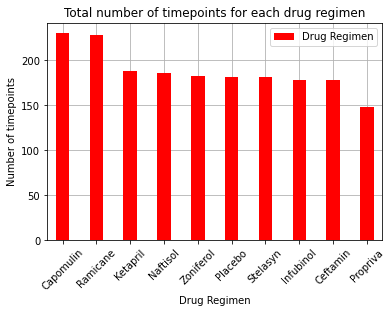

In [334]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_regi = data_df["Drug Regimen"].value_counts()
data_bar = data_regi.plot.bar(x="Drug Regimen", y="Number of Timepoints", color= "r", rot = "45", width = 0.4, zorder = 2)
data_bar.set_xlabel("Drug Regimen")
data_bar.set_ylabel("Number of timepoints")
data_bar.set_title("Total number of timepoints for each drug regimen")
data_bar.grid()
data_bar.legend();


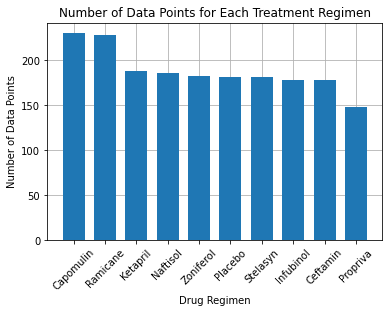

In [308]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts= data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')
plt.grid(zorder=0)
data_bar.legend()
plt.show()


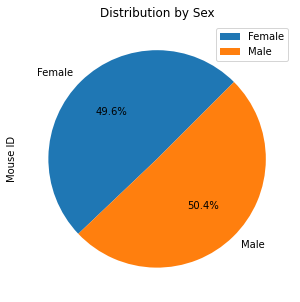

In [335]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_sex = data_df.groupby("Sex").nunique()["Mouse ID"]
data_sex = data_sex.plot.pie(y="Sex", autopct="%1.1f%%", figsize=(5,5), startangle=45, title = "Distribution by Sex", legend = "bestloc")

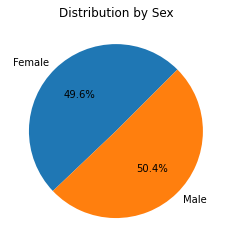

In [336]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data_sex = data_df.groupby("Sex").nunique()["Mouse ID"]
plt.pie(data_sex, labels = data_sex.index.values, autopct="%1.1f%%", startangle=45)
plt.title("Distribution by Sex")
plt.show;


## Quartiles, Outliers and Boxplots

In [337]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_df.groupby("Mouse ID").max(["Timepoint"])
last_timepoint_df = pd.DataFrame(last_timepoint)

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_last_timepoint_df = pd.merge(data_df, last_timepoint_df)
combined_last_timepoint_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,i557,Capomulin,Female,1,24,45,47.685963,1
1,a203,Infubinol,Female,20,23,45,67.973419,2
2,a251,Infubinol,Female,21,25,45,65.525743,1
3,a262,Placebo,Female,17,29,0,45.000000,0
4,v199,Naftisol,Female,17,29,0,45.000000,0


In [312]:
# Start by getting the last (greatest) timepoint for each mouse

max_time_df= pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint':'max_timepoint'}))
max_time_df

merged_df = pd.merge(max_time_df, data_df, on = 'Mouse ID')
merged_df
                                                                                                                                                                                                                                      

,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,0,Ceftamin,Male,2,30,0,45.000000,0
1,x226,0,Ceftamin,Male,23,28,0,45.000000,0
2,f932,0,Ketapril,Male,15,29,0,45.000000,0
3,x336,0,Naftisol,Female,4,29,0,45.000000,0
4,l872,0,Placebo,Male,19,30,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [356]:
# Put treatments into a list for for loop (and later for plot labels)
final_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_value = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in final_drugs:
    term_merge_df = merged_df.loc[merged_df['Drug Regimen']== drug]  
    
    final_volume_df = term_merge_df.loc[term_merge_df['Timepoint']== term_merge_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']  
    drug_value.append(values)
    
    quar = values.quantile([0.25,0.5,0.75])
    lower = quar[0.25]
    uper = quar[0.75]
    i = uper - lower
    
    print(f'IQR for {drug}:{round((i),2)}')
           
    lower_bound = lower - (1.5*i)
    uper_bound = uper + (1.5*i)    
    
    print(f'Lower bound for {drug}: {round((lower_bound),2)}')
    print(f'Uper bound for {drug}:  {round((uper_bound),2)}')
    
    outliers_count= (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= uper_bound)|
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {drug} outliers is {outliers_count}')                  
    

IQR for Capomulin:7.78
Lower bound for Capomulin: 20.7
Uper bound for Capomulin:  51.83
Number of Capomulin outliers is 0
IQR for Ramicane:9.1
Lower bound for Ramicane: 17.91
Uper bound for Ramicane:  54.31
Number of Ramicane outliers is 0
IQR for Infubinol:11.48
Lower bound for Infubinol: 36.83
Uper bound for Infubinol:  82.74
Number of Infubinol outliers is 1
IQR for Ceftamin:15.58
Lower bound for Ceftamin: 25.36
Uper bound for Ceftamin:  87.67
Number of Ceftamin outliers is 0


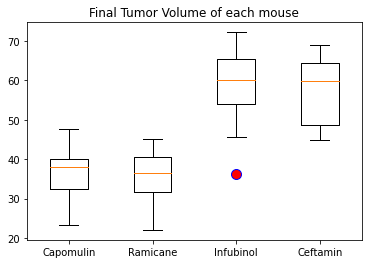

In [346]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flier = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='blue')
plt.boxplot(drug_value, flierprops=flier)
plt.title('Final Tumor Volume of each mouse')
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);


## Line and Scatter Plots

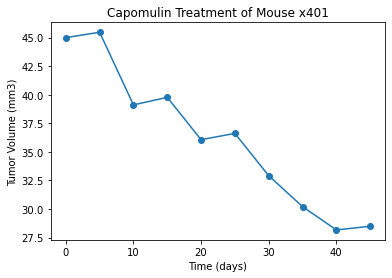

In [347]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse=data_df.loc[data_df['Mouse ID']== 'x401']
# cap_mouse1=cap_mouse.loc[cap_mouse['Mouse ID']=='1509']
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = 'o');

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse x401')
plt.show()


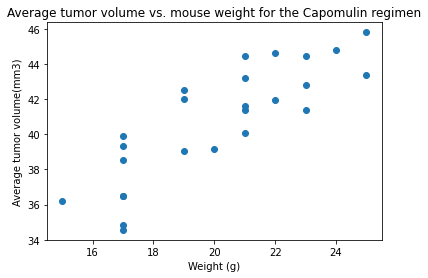

In [357]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_df=data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
ave_tumor_df=pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)':'ave_tumor_vol'})
ave_tumor_df=pd.merge(capo_df,ave_tumor_df, on = "Mouse ID")
final_ave_tumor_df = ave_tumor_df[['Weight (g)','ave_tumor_vol']].drop_duplicates()
final_ave_tumor_df

x =final_ave_tumor_df['Weight (g)']
y =final_ave_tumor_df['ave_tumor_vol']

plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume(mm3)')
plt.title ('Average tumor volume vs. mouse weight for the Capomulin regimen);


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


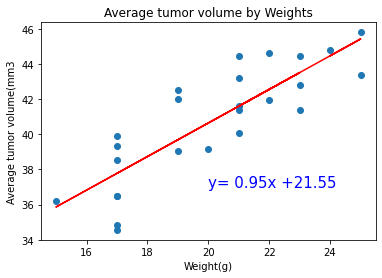

In [362]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation  = st.pearsonr(x,y)
print(f'Correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x*slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x, regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="blue")

plt.xlabel('Weight(g)')
plt.ylabel('Average tumor volume(mm3')
plt.title('Average tumor volume by Weights')
plt.show()
